In [1]:
import numpy as np
from scipy.sparse import csr_matrix
import zipfile
import os.path

In [20]:
def loadCancerDataPosNeg(filename):
# This function returns a (Dx2V) sparse matrix 
# where each row is a patient, 
# each column is a gene (we set 2 columns per gene; gene_neg and gene_pos to represent dropout and amplification events)
# and each entry represents an event (entry is 1 or 2, its column depends on the sign (- or +)).
#
# filename = "data_CNA_notna.txt"
# tf = loadCancerDataPosNeg(filename)
    filepath = "CancerData/" + filename
    status = os.path.isfile(filepath) 
    if(not status):
        zipp = zipfile.ZipFile("./data_CNA_notna.txt.zip")
        zipp.extractall("CancerData")

    with open(filepath) as infile:
        # Read header line
        first_line = infile.readline()
    
        numColumns = len(first_line.split("\t"))
        numPatients = numColumns - 2 # Except first two columns

        # Read remaning lines
        linenum = 0
        rows = []
        cols = []
        data = []
        
        gene_labels = []
        for line in infile:
            all_contents = line.split()
            
            label_str = all_contents[0] + "_neg"
            gene_labels.append(label_str)
            label_str = all_contents[0] + "_pos"
            gene_labels.append(label_str)
            
            contents = all_contents[2:]
            
            contents = np.array(list(map(int, contents)))
            nonzeros = np.where(contents != 0)[0]
            
            for n in range(nonzeros.shape[0]):
                val = contents[nonzeros[n]]
                
                rows.append(nonzeros[n]) 
                if val<0:
                    cols.append(2*linenum) # negative words (lost the gene)
                else:
                    cols.append(2*linenum+1) # positive words (have multiple genes)
                data.append(np.abs(val))
                
            linenum = linenum + 1

    numGenes = linenum 
    
    rows = np.array(rows)
    cols = np.array(cols)
    data = np.array(data)

    geneMatrix = csr_matrix((data, (rows, cols)), shape=(numPatients, 2*numGenes))
    
    return geneMatrix, gene_labels

def loadCancerDataBinary(filename):
# This function returns a binary (DxV) sparse matrix 
# where each row is a patient, each column is a gene
# and each entry represents an event (entry is 1 if copy number is (-2,-1,1 or 2)).
#
# filename = "data_CNA_notna.txt"
# tf = loadCancerDataBinary(filename)
    filepath = "CancerData/" + filename
    status = os.path.isfile(filepath) 
    if(not status):
        zipp = zipfile.ZipFile("./data_CNA_notna.txt.zip")
        zipp.extractall("CancerData")
        
    with open(filepath) as infile:
        # Read header line
        first_line = infile.readline()

        numColumns = len(first_line.split("\t"))
        numPatients = numColumns - 2 # Except first two columns

        # Read remaning lines
        linenum = 0
        rows = []
        cols = []
        for line in infile:
            contents = line.split()[2:]

            contents = np.array(list(map(int, contents)))
            nonzeros = np.where(contents != 0)[0]

            for n in range(nonzeros.shape[0]):
                rows.append(nonzeros[n]) # patients who have the words
                cols.append(linenum)     # word id

            linenum = linenum + 1

    numGenes = linenum 
    
    rows = np.array(rows)
    cols = np.array(cols)
    data = np.ones((rows.shape[0]))

    geneMatrix = csr_matrix((data, (rows, cols)), shape=(numPatients, numGenes))
    return geneMatrix

def loadCancerDataAbsolute(filename):
# This function returns a (DxV) sparse matrix 
# where each row is a patient, each column is a gene
# and each entry represents an event (entry is 1 if copy number is (-1 or 1) or 2 if copy number is (-2 or 2)).
#
# filename = "data_CNA_notna.txt"
# tf = loadCancerDataAbsolute(filename)

    filepath = "CancerData/" + filename
    status = os.path.isfile(filepath) 
    if(not status):
        zipp = zipfile.ZipFile("./data_CNA_notna.txt.zip")
        zipp.extractall("CancerData")

    with open(filepath) as infile:
        # Read header line
        first_line = infile.readline()

        numColumns = len(first_line.split("\t"))
        numPatients = numColumns - 2 # Except first two columns

        # Read remaning lines
        linenum = 0
        rows = []
        cols = []
        data = []
        for line in infile:
            contents = line.split()[2:]

            contents = np.array(list(map(int, contents)))
            nonzeros = np.where(contents != 0)[0]

            for n in range(nonzeros.shape[0]):
                rows.append(nonzeros[n]) # patients who have the words
                cols.append(linenum)     # word id
                data.append(np.abs(contents[nonzeros[n]]))
                
            linenum = linenum + 1

    numGenes = linenum 
    
    rows = np.array(rows)
    cols = np.array(cols)
    data = np.array(data)

    geneMatrix = csr_matrix((data, (rows, cols)), shape=(numPatients, numGenes))
    return geneMatrix


def getGeneLabels(filename):
    filepath = "CancerData/" + filename
    status = os.path.isfile(filepath) 
    if(not status):
        zipp = zipfile.ZipFile("./data_CNA_notna.txt.zip")
        zipp.extractall("CancerData")

    with open(filepath) as infile:
        # Read header line
        first_line = infile.readline()
    
        # Read remaning lines
        gene_labels = []
        for line in infile:
            content = line.split()[0]
            gene_labels.append(content + "_neg")
            gene_labels.append(content + "_pos")
            
    return gene_labels

In [15]:
filename = "data_CNA_notna.txt"
tf, gene_labels=loadCancerDataPosNeg(filename)# loadCancerDataPosNeg(filename) or tf=loadCancerDataAbsolute(filename) or tf=loadCancerDataBinary(filename)
tf

<2173x45088 sparse matrix of type '<type 'numpy.int64'>'
	with 13431717 stored elements in Compressed Sparse Row format>

In [21]:
gene_labels_2 = getGeneLabels(filename)
gene_labels_2

['A1BG_neg',
 'A1BG_pos',
 'A1BG-AS1_neg',
 'A1BG-AS1_pos',
 'A1CF_neg',
 'A1CF_pos',
 'A2M_neg',
 'A2M_pos',
 'A2M-AS1_neg',
 'A2M-AS1_pos',
 'A2ML1_neg',
 'A2ML1_pos',
 'A2MP1_neg',
 'A2MP1_pos',
 'A3GALT2_neg',
 'A3GALT2_pos',
 'A4GALT_neg',
 'A4GALT_pos',
 'A4GNT_neg',
 'A4GNT_pos',
 'AAAS_neg',
 'AAAS_pos',
 'AACS_neg',
 'AACS_pos',
 'AACSP1_neg',
 'AACSP1_pos',
 'AADAC_neg',
 'AADAC_pos',
 'AADACL2_neg',
 'AADACL2_pos',
 'AADACL3_neg',
 'AADACL3_pos',
 'AADACL4_neg',
 'AADACL4_pos',
 'AADAT_neg',
 'AADAT_pos',
 'AAED1_neg',
 'AAED1_pos',
 'AAGAB_neg',
 'AAGAB_pos',
 'AAK1_neg',
 'AAK1_pos',
 'AAMDC_neg',
 'AAMDC_pos',
 'AAMP_neg',
 'AAMP_pos',
 'AA0T_neg',
 'AA0T_pos',
 'AAR2_neg',
 'AAR2_pos',
 'AARD_neg',
 'AARD_pos',
 'AARS_neg',
 'AARS_pos',
 'AARS2_neg',
 'AARS2_pos',
 'AARSD1_neg',
 'AARSD1_pos',
 'AASDH_neg',
 'AASDH_pos',
 'AASDHPPT_neg',
 'AASDHPPT_pos',
 'AASS_neg',
 'AASS_pos',
 'AATF_neg',
 'AATF_pos',
 'AATK_neg',
 'AATK_pos',
 'AATK-AS1_neg',
 'AATK-AS1_pos',
 'ABAT

In [12]:
len(gene_labels)

45088

In [13]:
gene_labels

['A1BG_neg',
 'A1BG',
 'A1BG-AS1_neg',
 'A1BG-AS1',
 'A1CF_neg',
 'A1CF',
 'A2M_neg',
 'A2M',
 'A2M-AS1_neg',
 'A2M-AS1',
 'A2ML1_neg',
 'A2ML1',
 'A2MP1_neg',
 'A2MP1',
 'A3GALT2_neg',
 'A3GALT2',
 'A4GALT_neg',
 'A4GALT',
 'A4GNT_neg',
 'A4GNT',
 'AAAS_neg',
 'AAAS',
 'AACS_neg',
 'AACS',
 'AACSP1_neg',
 'AACSP1',
 'AADAC_neg',
 'AADAC',
 'AADACL2_neg',
 'AADACL2',
 'AADACL3_neg',
 'AADACL3',
 'AADACL4_neg',
 'AADACL4',
 'AADAT_neg',
 'AADAT',
 'AAED1_neg',
 'AAED1',
 'AAGAB_neg',
 'AAGAB',
 'AAK1_neg',
 'AAK1',
 'AAMDC_neg',
 'AAMDC',
 'AAMP_neg',
 'AAMP',
 'AA0T_neg',
 'AA0T',
 'AAR2_neg',
 'AAR2',
 'AARD_neg',
 'AARD',
 'AARS_neg',
 'AARS',
 'AARS2_neg',
 'AARS2',
 'AARSD1_neg',
 'AARSD1',
 'AASDH_neg',
 'AASDH',
 'AASDHPPT_neg',
 'AASDHPPT',
 'AASS_neg',
 'AASS',
 'AATF_neg',
 'AATF',
 'AATK_neg',
 'AATK',
 'AATK-AS1_neg',
 'AATK-AS1',
 'ABAT_neg',
 'ABAT',
 'ABCA1_neg',
 'ABCA1',
 'ABCA10_neg',
 'ABCA10',
 'ABCA11P_neg',
 'ABCA11P',
 'ABCA12_neg',
 'ABCA12',
 'ABCA13_neg',
 'ABC

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

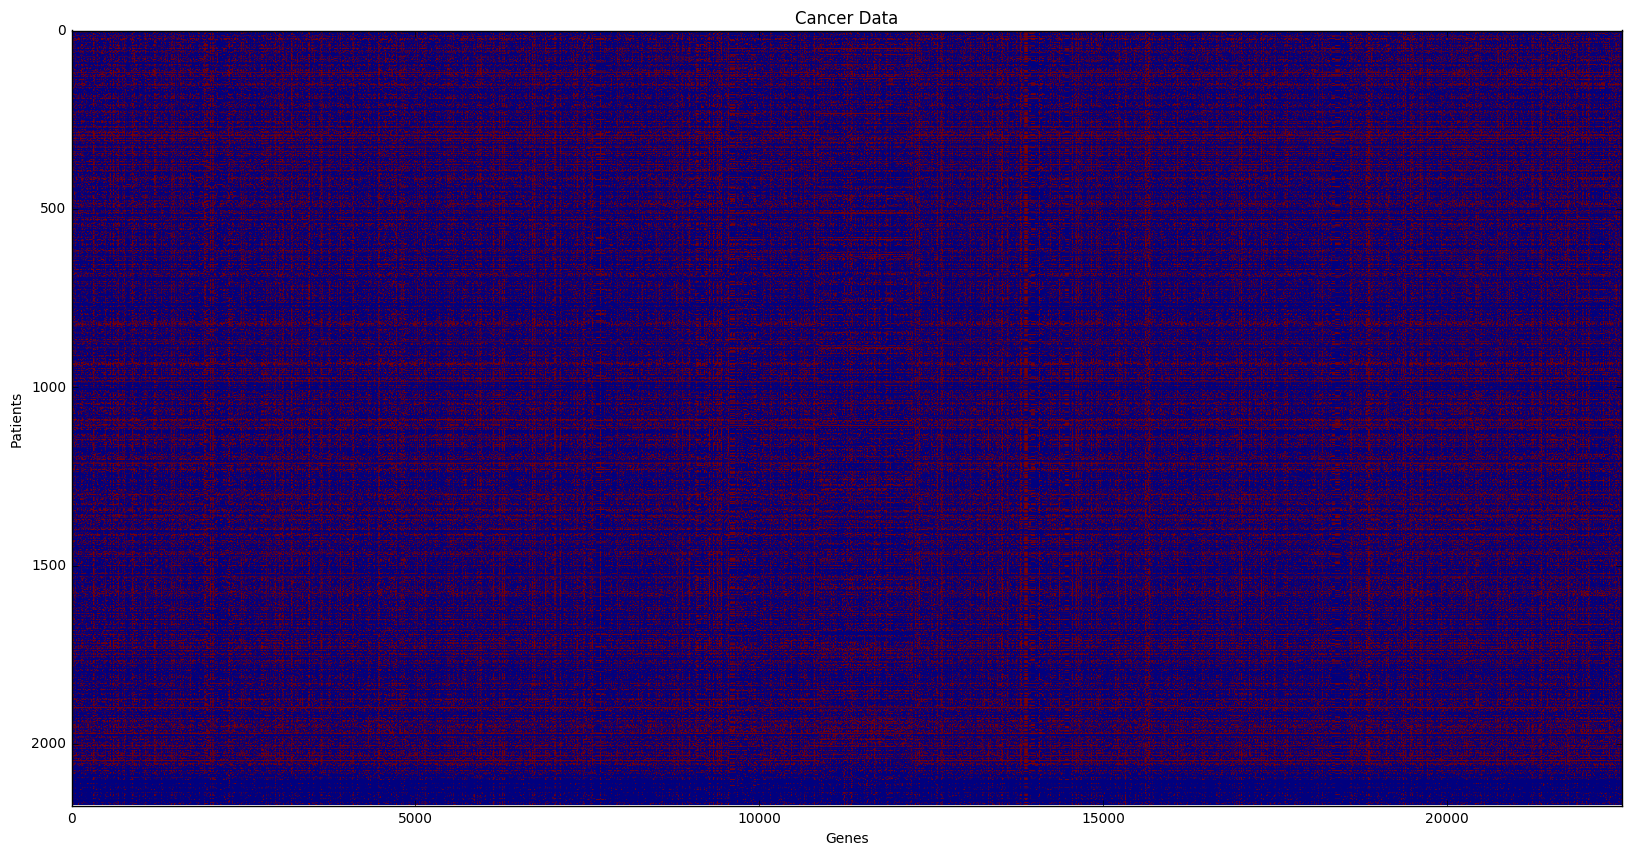

In [76]:
plt.figure(figsize=(20,10))
plt.xlabel("Genes")
plt.ylabel("Patients")
plt.title("Cancer Data")
plt.imshow(tf.toarray(), aspect="auto")
plt.show()